# EDA를 곁들인 베이스라인 코드

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터 분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

# 모델링
#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
# data load
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test_x.csv", index_col=0)
submission = pd.read_csv("sample_submission.csv", index_col=0)
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 77)
(11383, 76)
(11383, 1)


In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
train.head(20)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,2.0,1258,5.0,1451,1.0,1029,3.0,1633,1.0,2254,5.0,1984,1.0,1158,3.0,1194,3.0,483,1.0,983,1.0,817,5.0,1052,1.0,1354,1.0,747,2.0,1826,40s,2,1,6,Female,1,3,White,Other,5,5,5,4,5,3,3,7,5,3,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,2.0,549,5.0,390,4.0,1601,5.0,1312,1.0,1699,4.0,1229,4.0,1175,1.0,1078,4.0,341,5.0,635,2.0,1448,4.0,838,4.0,765,3.0,1954,1.0,1482,20s,2,1,3,Male,1,1,White,Atheist,2,4,3,5,1,1,3,2,1,5,2,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1
7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,1.0,483,1.0,592,1.0,2020,5.0,6022,5.0,2090,4.0,1767,5.0,982,5.0,1576,1.0,782,3.0,911,5.0,417,1.0,392,5.0,1510,1.0,842,1.0,1138,30s,2,1,1,Male,1,1,White,Christian_Other,3,6,0,0,0,0,0,1,2,6,2,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1
8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,2.0,1322,5.0,1014,5.0,3014,3.0,3771,3.0,13295,5.0,3605,3.0,9265,4.0,2531,1.0,812,4.0,2595,5.0,1227,5.0,1837,4.0,1218,4.0,9923,5.0,1631,20s,4,2,0,Female,2,1,Other,Christian_Other,1,1,2,1,2,2,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [4]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

# 기본정보와 qde, qda만 남기고 변수 제거

In [5]:
drop_val=['QaA', 'QbA', 'QbE', 'QcA', 'QcE', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE','tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']
train = train.drop(drop_val, axis=1)
test = test.drop(drop_val, axis=1)
train.head()
test.head()

,QaE,QdA,age_group,education,engnat,familysize,gender,hand,married,race,religion
index,,,,,,,,,,,
0,736,1.0,10s,2,2,3,Male,1,1,White,Christian_Protestant
1,514,3.0,10s,2,2,2,Male,2,1,Other,Christian_Catholic
2,500,2.0,30s,3,2,7,Male,1,2,Other,Christian_Other
3,669,2.0,60s,4,1,4,Male,1,2,White,Christian_Catholic
4,499,2.0,10s,2,1,3,Male,1,1,White,Agnostic


In [6]:
# missing 처리
print('train:', train.isnull().sum())
print('test: ', test.isnull().sum())

train: QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
voted         0
dtype: int64
test:  QaE           0
QdA           0
age_group     0
education     0
engnat        0
familysize    0
gender        0
hand          0
married       0
race          0
religion      0
dtype: int64


In [10]:
# preprocessing
# label encoding
label = LabelEncoder()
train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

drop2 = ['gender', 'age_group','race','religion']
train = train.drop(drop2, axis=1)
test = test.drop(drop2, axis=1)

<BarContainer object of 2 artists>

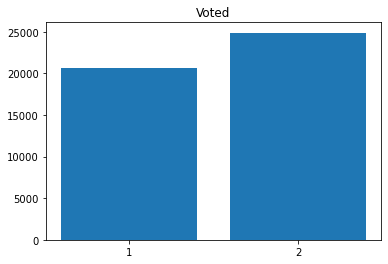

In [12]:
# visualization
# target 변수의 분포 파악
train_y = train['voted']

tar = [str(train_y.unique()[1]), str(train_y.unique()[0])]
count = [train_y.value_counts()[1], train_y.value_counts()[2]]
plt.title('Voted')
plt.bar(tar, count)

<AxesSubplot:xlabel='gender_code', ylabel='count'>

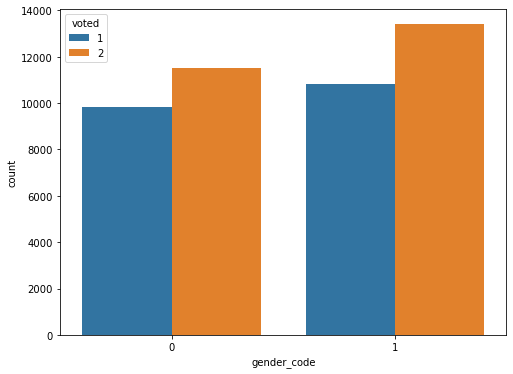

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x ='gender_code', hue = train_y)

<AxesSubplot:xlabel='age_group_code', ylabel='count'>

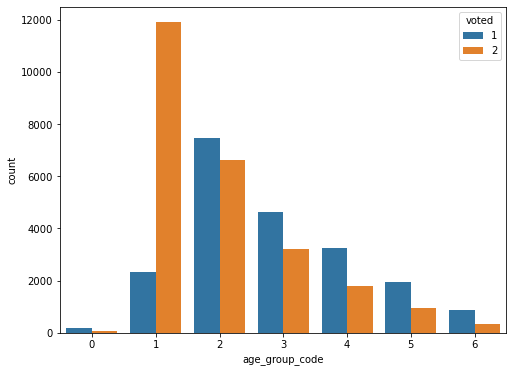

In [15]:
# 굉장히 다른 성향을 보이는 age group 이 존재
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='age_group_code', hue = train_y)

<AxesSubplot:>

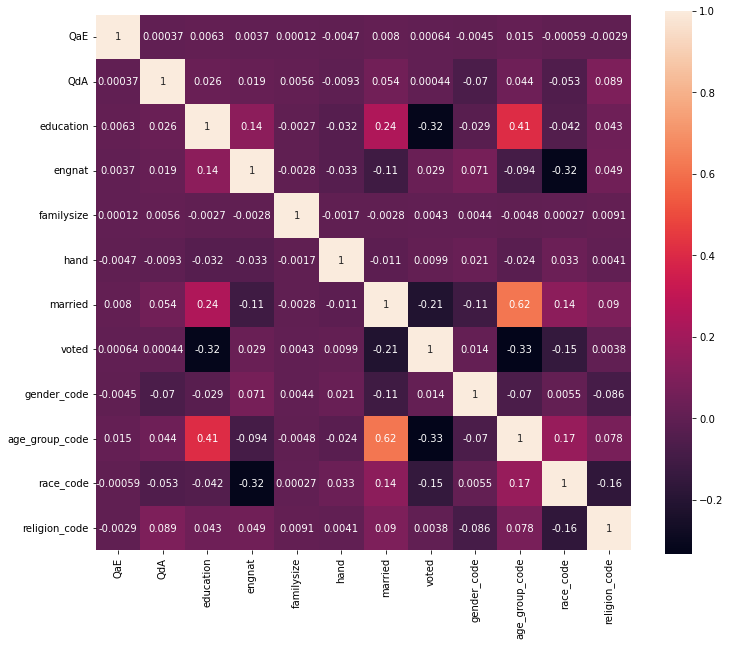

In [16]:
# heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), square = True, annot = True)

<AxesSubplot:xlabel='QdA', ylabel='count'>

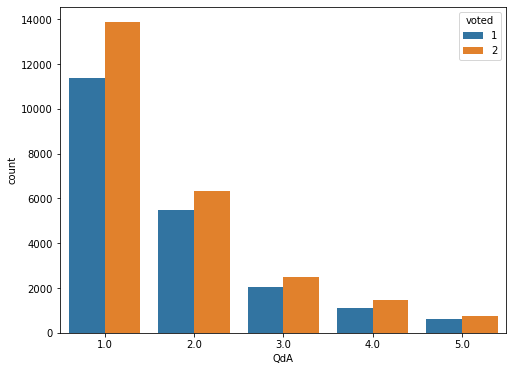

In [17]:
# question 을 이용한 feature 추출 예시
# 가설 1: 고민시간이 긴 질문은 영향을 많이 주는 질문일 것이다. 
plt.figure(figsize=(8,6))
sns.countplot(data = train, x = 'QdA', hue = train_y)

In [20]:
# 가설 2: 특정 성향의 사람들은 답변 응답시간이 더 길 것이다. 
def plot_to_voted(data, var, target):
    plt.figure(figsize=(8,6))
    for tar in target:
        u = np.percentile(data[data['voted']==tar][var],95)
        d = np.percentile(data[data['voted']==tar][var],5)
        column = [val for val in data[data['voted']==tar][var] if d < val < u]
        sns.distplot(column)
    plt.title(var)
    plt.legend(target)
    plt.show()

/Users/suhyeon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suhyeon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


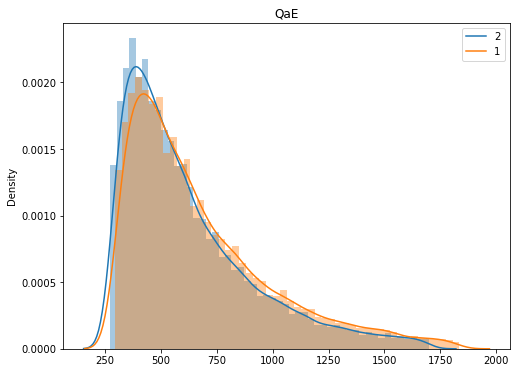

In [21]:
plot_to_voted(train, 'QaE', train_y.unique())

In [22]:
# modeling
# 변수 제거
drop_last = ['familysize','gender_code','hand','education']
new_train = train.drop(drop_last, axis =1)
new_train = new_train.drop(['voted'], axis =1)
test = test.drop(drop_last, axis =1)

In [23]:
new_train.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,363,1.0,1,3,3,6,10
1,647,5.0,2,1,2,1,7
2,1623,4.0,1,2,3,6,10
3,504,3.0,2,1,2,1,7
4,927,2.0,1,2,2,6,0


In [24]:
test.head()

,QaE,QdA,engnat,married,age_group_code,race_code,religion_code
index,,,,,,,
0,736,1.0,2,1,1,6,6
1,514,3.0,2,1,1,5,3
2,500,2.0,2,2,3,5,5
3,669,2.0,1,2,6,6,3
4,499,2.0,1,1,1,6,0


In [29]:
from lightgbm import LGBMClassifier

In [33]:
model = LGBMClassifier(n_estimators=500)
model.fit(new_train,train_y)

LGBMClassifier(n_estimators=500)

In [35]:
pred_y = model.predict(test)

In [36]:
pred_y

array([2, 2, 1, ..., 1, 1, 2])

In [37]:
submission['voted'] = pred_y

In [38]:
submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,2
11379,2
11380,1


In [39]:
submission.to_csv('sample_submission.csv')

In [40]:
# 초급자 제출용 베이스라인 코드
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
# 경로 설정을 꼭 신경써주세요
train = pd.read_csv('train.csv', index_col=0) # index col=0도 check
test = pd.read_csv("test_x.csv", index_col=0)
submission = pd.read_csv('sample_submission.csv', index_col=0)

In [43]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1


In [44]:
test

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1


In [45]:
# 타겟인 'voted' 변수를 train_y로 만들어줍니다. 
train_x = train.drop('voted', axis=1)
train_y = train['voted']

In [47]:
# 빠른 제출 절차를 확인하기 위해 '문자열' 변수들을 '이산형'으로 변환해줍니다. 
# age_group, gender, race, religion

train_x['age_group'] = 1
train_x['gender'] = 1
train_x['race'] = 1
train_x['religion'] = 1

test['age_group'] = 1
test['gender'] = 1
test['race'] = 1
test['religion'] =1

In [48]:
# lgbm으로 분석
model = lgbm.LGBMClassifier(n_estimators=500)
model.fit(train_x, train_y)

LGBMClassifier(n_estimators=500)

In [49]:
# 예측치를 구해주고
pred_y = model.predict(test)

In [50]:
pred_y

array([2, 2, 1, ..., 1, 1, 2])

In [51]:
submission['voted'] = pred_y

In [52]:
submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,1
11379,2
11380,1


In [53]:
# 제출
submission.to_csv("sample_submission.csv")

# 정형데이터는 automl에 때려박고 시작하자

pycaret 이라는 automl 패키지를 이용하여 자체 베이스라인 모델을 구축하였습니다. 
Feature engineering, model tunning 없이 주어진 데이터를 그대로 사용하여 deault 모델을 훈련하고 예측했으므로, 추가작업을 통해 높은 성능을 보여줄 수 있을 것 같습니다. 

개인적으로 pycaret은 아직까지 single output인 문제에는 적합한데 multi output문제에는 부적합것 같습니당,

In [3]:
# 데이터 불러오기 
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test_x.csv")
submission = pd.read_csv("sample_submission.csv")

In [4]:
# 데이터 구조 확인
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 78)
(11383, 77)
(11383, 2)


In [2]:
# 분류 작업에 필요한 함수 불러오기 
from pycaret.classification import*

In [1]:
import jinja2

# 실험환경 구축 (setup the environment)
- pycaret에서는 모델 학습 전 실험환경을 구축해야한다. Setup 함수를 통해 환경을 구축할 수 있다. 
setup 단계에서는 Pycaret이 자동으로 컬럼 형태를 인식한다. 그후 사용자에게 제대로 인식되었는지 
확인을 받게된다. 그때 enter를 눌러주면 된다. 
또한 주어진 데이터의 얼마를 사용하여 train/validation을 구축할지 묻게되는데, 
전체데이터를 사용하고 싶다면 enter를 눌러주면된다. 

In [9]:
# voted 컬럼이 예측대상이므로 target인자에 명시
clf = setup(data = train, target='voted',fold_shuffle=True)

,Description,Value
0,session_id,6674
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 78)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,35
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

# 모델 학습 및 비교 
- 환경을 구축했으니 pycaret에서 제공하는 기본 모델에 대해 학습하고 비교해보겠다 
compared_models 함수를 통해 15개의 기본 모델을 학습하고 성능을 비교할 수 있다. 
auc가 기준으로 성능이 가장 좋은 3개의 모델을 추려내어 저장해보겠다. 
본 대회 평가 지표가 auc이기 때문에 auc 기준으로 모델을 선정합니다. 

In [11]:
best_3 = compare_models(sort='AUC',n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6945,0.7652,0.6601,0.7496,0.7020,0.3912,0.3946,2.0810
gbc,Gradient Boosting Classifier,0.6959,0.7649,0.6458,0.7602,0.6983,0.3958,0.4012,2.1740
lightgbm,Light Gradient Boosting Machine,0.6940,0.7636,0.6469,0.7566,0.6974,0.3917,0.3967,3.5700
et,Extra Trees Classifier,0.6931,0.7623,0.6445,0.7565,0.6960,0.3900,0.3952,0.9600
lda,Linear Discriminant Analysis,0.6926,0.7619,0.6637,0.7448,0.7019,0.3868,0.3897,0.1460
ada,Ada Boost Classifier,0.6913,0.7577,0.6560,0.7469,0.6985,0.3849,0.3883,0.4250
rf,Random Forest Classifier,0.6860,0.7547,0.6338,0.7513,0.6875,0.3764,0.3820,0.9570
xgboost,Extreme Gradient Boosting,0.6787,0.7458,0.6673,0.7222,0.6936,0.3569,0.3582,5.8590
dt,Decision Tree Classifier,0.6085,0.6051,0.6432,0.6404,0.6418,0.2103,0.2103,0.1900
lr,Logistic Regression,0.5452,0.5414,0.9949,0.5454,0.7046,0.0013,0.0079,0.5720


catBoost classifer, gradient boosting classifier, lgbm이 가장 좋은 3개의 모델임을 확인

# 모델앙상블
- 3개의 모델을 앙상블 시키도록 한다. 본 대회는 score최적화를 위해 확률값을 예측해야하므로 soft vote ensemble을 진행하겠다.

In [12]:
blended = blend_models(estimator_list = best_3, fold=5, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6951,0.7677,0.6458,0.7589,0.6978,0.3941,0.3993
1,0.6965,0.7684,0.6578,0.7540,0.7026,0.3956,0.3994
2,0.6999,0.7684,0.6435,0.7684,0.7004,0.4044,0.4108
3,0.6989,0.7690,0.6463,0.7650,0.7007,0.4021,0.4079
4,0.6906,0.7631,0.6422,0.7537,0.6935,0.3852,0.3902
Mean,0.6962,0.7673,0.6471,0.7600,0.6990,0.3963,0.4015
SD,0.0033,0.0021,0.0056,0.0059,0.0032,0.0068,0.0073


# 모델예측
구축된 앙상블모델을 통해 예측을 해보겠습니다. 
setup 환경에 이미 hold-out set이 존재하므로 해당 데이터에 대해 예측을 하여 모델성능을 확인하겠습니다. 

In [14]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6952,0.7667,0.6497,0.7618,0.7013,0.3941,0.3993


# 전체 데이터에 대한 재학습
현재까지 실험은 주어진 train 데이터를 다시 한번 train/validaton으로 나눠서 실험을 한것으로, 전체 train에 대해 학습되어 있지 않습니다. 
최적의 성능을 위해 전체 데이터에 학습을 시켜주도록 하겠다. 

In [15]:
final_model = finalize_model(blended)

In [16]:
predictions = predict_model(final_model, data=test)

In [17]:
predictions

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Label,Score
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,0,1,0,1,0,1,1,2,0.6455
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,2,0.8875
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,1,0,1,0,1,1,1,0.5240
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,0.8225
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,0,1,1,0,1,1,1,1,2,0.7541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,0,1,1,0,1,0,1,1,1,0.5738
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,2,0.8907
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,0,1,1,0,1,0,1,1,1,0.7789
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,0,1,1,0,1,1,1,0,1,0.6910


In [18]:
submission['voted'] = predictions['Score']
submission.to_csv('submission_proba.csv', index=False)

# 3주차 선택과제

In [20]:
# library load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(12,10))

# 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# 모델링
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

# 
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

<Figure size 864x720 with 0 Axes>

In [21]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

train = pd.read_csv("train.csv")
test = pd.read_csv('test_x.csv')
train_y = train['voted']

In [22]:
display(train)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


In [23]:
def show_vote_rate(data, target, element=None):
    target = str(target)
    if element == None:
        element = data[target].unique()
        print(element)
        
    result = []
    for e in element:
        y = data.query(target+'=='+str(e)+"and voted==1").shape[0]
        n = data.query(target+'=='+str(e)+'and voted==2').shape[0]
        print(e,y,n)
        result.append(y/(y+n))
        
    print(result)
    plt.bar(element, result)
    plt.show()

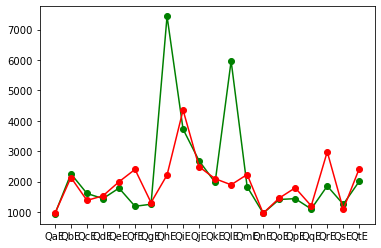

In [24]:
vote_y_data = train.loc[train.voted==1]
vote_n_data = train.loc[train.voted==2]
y_times = vote_y_data.iloc[:, 2:41:2]
n_times = vote_n_data.iloc[:, 2:41:2]
y_mean = y_times.describe().loc['mean']
plt.plot(y_mean, "go-")
n_mean = n_times.describe().loc['mean']
plt.plot(n_mean,'ro-')
plt.show()

In [25]:
display(vote_y_data.loc[:,'QhE'].describe())
print("=========")
display(vote_n_data.loc[:,'QhE'].describe())

count    2.063400e+04
mean     7.441106e+03
std      7.456198e+05
min      0.000000e+00
25%      1.104000e+03
50%      1.490000e+03
75%      2.122000e+03
max      1.070860e+08
Name: QhE, dtype: float64

count    2.489800e+04
mean     2.216696e+03
std      1.267777e+04
min      2.500000e+01
25%      1.056000e+03
50%      1.442000e+03
75%      2.064000e+03
max      1.178668e+06
Name: QhE, dtype: float64

In [26]:
# u = np.percentile(vote_y_data,95)
def del_strange_data(data, columns=None, per=95):
    if columns==None:
        columns = list(data.columns)
    cut_lines = dict()
    for key in columns:
        u = np.percentile(data.loc[:,key],per)
        cut_lines[key]=u
    for key in columns:
        data = data[data[key]<cut_lines[key]]
        
    return data
y_times = del_strange_data(y_times)
n_times = del_strange_data(n_times)

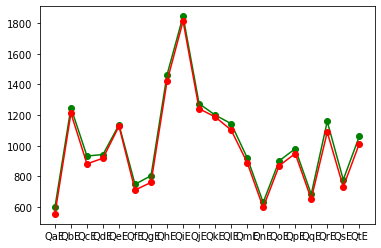

In [27]:
y_mean = y_times.describe().loc['mean']
plt.plot(y_mean,"go-")
n_mean = n_times.describe().loc['mean']
plt.plot(n_mean,'ro-')
plt.show()

In [28]:
# 소요 시간이 길수록 투표할 확률이 높다는 것을 확인할 수 있다.

In [29]:
print(y_times.sum(axis=1).describe())
print(n_times.sum(axis=1).describe())

count    12055.000000
mean     20452.859311
std       5415.735656
min        908.000000
25%      16523.500000
50%      20022.000000
75%      23879.000000
max      46304.000000
dtype: float64
count    14781.000000
mean     19725.853393
std       5334.246933
min        730.000000
25%      15946.000000
50%      19267.000000
75%      23105.000000
max      40901.000000
dtype: float64
